In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd


In [2]:
url="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date="
date='20210111'

html=requests.get(url+date)
html

<Response [200]>

In [12]:
soup=bs(html.content)
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20210111" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [21]:
title=soup.find_all('div',class_='tit5')
title_lst=[]

for tit in title:
    tmp=tit.find('a').text
    link=tit.find('a')['href']
    title_lst.append([date,tmp,link])

In [22]:
title_lst[:5]

[['20210111', '가나의 혼인잔치: 언약', '/movie/bi/mi/basic.nhn?code=197647'],
 ['20210111', '극장판 바이올렛 에버가든', '/movie/bi/mi/basic.nhn?code=196843'],
 ['20210111', '언플랜드', '/movie/bi/mi/basic.nhn?code=182525'],
 ['20210111', '부활: 그 증거', '/movie/bi/mi/basic.nhn?code=194334'],
 ['20210111',
  '페이트 스테이 나이트 헤븐즈필 III.스프링 송',
  '/movie/bi/mi/basic.nhn?code=195687']]

In [23]:
point_tag=soup.find_all('td',class_='point')
point_lst=[]

for p in point_tag:
    point_lst.append(p)
point_lst[:5]

[<td class="point">9.52</td>,
 <td class="point">9.52</td>,
 <td class="point">9.47</td>,
 <td class="point">9.40</td>,
 <td class="point">9.28</td>]

In [27]:
df=pd.DataFrame(title_lst,columns=['날짜','제목','링크'])
df['평점']=point_lst
df.head()

,날짜,제목,링크,평점
0,20210111,가나의 혼인잔치: 언약,/movie/bi/mi/basic.nhn?code=197647,[9.52]
1,20210111,극장판 바이올렛 에버가든,/movie/bi/mi/basic.nhn?code=196843,[9.52]
2,20210111,언플랜드,/movie/bi/mi/basic.nhn?code=182525,[9.47]
3,20210111,부활: 그 증거,/movie/bi/mi/basic.nhn?code=194334,[9.40]
4,20210111,페이트 스테이 나이트 헤븐즈필 III.스프링 송,/movie/bi/mi/basic.nhn?code=195687,[9.28]


In [28]:
from datetime import date,timedelta

In [29]:
sDate=date(2020,12,1)
sDate.strftime('%Y-%m-%d')

'2020-12-01'

In [30]:
date_req=pd.date_range(sDate,periods=31,freq='d')
date_req

DatetimeIndex(['2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12',
               '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20',
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='D')

### 네이버 영화 평점 순위

In [52]:
#입력 날짜를 기준으로 입력된 기간 전일의 데이터를 가져온다.
import requests 
from bs4 import BeautifulSoup
from datetime import date,timedelta
import pandas as pd

url="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date="

YY=int(input("기준 년도를 입력하세요(예: 2020): "))
MM=int(input("기준 월을 입력하세요(예:7): "))
DD=int(input("기준 일을 입력하세요(예:3): "))
period=int(input('크롤링 하고자 하는 기간을 입력해 주세요: '))

start_date=date(YY,MM,DD)
timegap=timedelta(days=period)
start_date=start_date-timegap
start_date=start_date.strftime('%Y-%m-%d')
range_date=pd.date_range(start_date,periods=period,freq='D')

tit_lst=[]
link_lst=[]
date_lst=[]
point_lst=[]
for today in range_date:
    html=requests.get(url+today.strftime('%Y%m%d'))
    soup=bs(html.content,'html.parser')
    
    #해당 페이지(날짜별 페이지)에서 영화 제목 추출
    tit5_tag=soup.find_all('div',class_='tit5')
     #해당 페이지(날짜별 페이지)에서 영화 평점 추출
    point_tag=soup.find_all('td',class_='point')
    
    for num in range(len(tit5_tag)):
        
        title=tit5_tag[num].find('a').text
        link="https://movie.naver.com"+tit5_tag[num].find('a')['href']
        tit_lst.append(title)
        link_lst.append(link)
        
        #point_tag의 num번째 요소에 접근하여 영화 평점 추출
        point=point_tag[num].text
        point_lst.append(point)
        
        #날짜
        date_lst.append(today.strftime('%Y-%m-%d'))
mov_df=pd.DataFrame({'Date':date_lst,
                    'Title':tit_lst,
                    'Link':link_lst,
                    'Point':point_lst})
mov_df


기준 년도를 입력하세요(예: 2020): 2021
기준 월을 입력하세요(예:7): 01
기준 일을 입력하세요(예:3): 11
크롤링 하고자 하는 기간을 입력해 주세요: 10


,Date,Title,Link,Point
0,2021-01-01,가나의 혼인잔치: 언약,https://movie.naver.com/movie/bi/mi/basic.nhn?...,9.59
1,2021-01-01,언플랜드,https://movie.naver.com/movie/bi/mi/basic.nhn?...,9.52
2,2021-01-01,극장판 바이올렛 에버가든,https://movie.naver.com/movie/bi/mi/basic.nhn?...,9.49
3,2021-01-01,부활: 그 증거,https://movie.naver.com/movie/bi/mi/basic.nhn?...,9.40
4,2021-01-01,소년시절의 너,https://movie.naver.com/movie/bi/mi/basic.nhn?...,9.39
...,...,...,...,...
460,2021-01-10,루비 스팍스,https://movie.naver.com/movie/bi/mi/basic.nhn?...,7.51
461,2021-01-10,협상,https://movie.naver.com/movie/bi/mi/basic.nhn?...,7.32
462,2021-01-10,도굴,https://movie.naver.com/movie/bi/mi/basic.nhn?...,7.32
463,2021-01-10,애비규환,https://movie.naver.com/movie/bi/mi/basic.nhn?...,7.05


In [53]:
mov_df['Point']=mov_df['Point'].astype(float)
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    465 non-null    object 
 1   Title   465 non-null    object 
 2   Link    465 non-null    object 
 3   Point   465 non-null    float64
dtypes: float64(1), object(3)
memory usage: 14.7+ KB


In [57]:
#피벗 테이블(중복제거)
mov_unique=pd.pivot_table(mov_df,index=['Title'],aggfunc=sum)
mov_unique.head()

,Point
Title,
800,25.27
가나의 혼인잔치: 언약,95.32
굿바이,90.40
귀여운 여인,34.80
극장판 바이올렛 에버가든,95.06


In [58]:
mov_unique.sort_values(by='Point',ascending=False).head(10)

,Point
Title,
가나의 혼인잔치: 언약,95.32
극장판 바이올렛 에버가든,95.06
언플랜드,94.94
부활: 그 증거,94.00
페이트 스테이 나이트 헤븐즈필 III.스프링 송,92.66
제리 맥과이어,91.60
사랑의 블랙홀,91.50
러브레터,91.20
타오르는 여인의 초상,90.64


In [59]:
mov_df

,Date,Title,Link,Point
0,2021-01-01,가나의 혼인잔치: 언약,https://movie.naver.com/movie/bi/mi/basic.nhn?...,9.59
1,2021-01-01,언플랜드,https://movie.naver.com/movie/bi/mi/basic.nhn?...,9.52
2,2021-01-01,극장판 바이올렛 에버가든,https://movie.naver.com/movie/bi/mi/basic.nhn?...,9.49
3,2021-01-01,부활: 그 증거,https://movie.naver.com/movie/bi/mi/basic.nhn?...,9.40
4,2021-01-01,소년시절의 너,https://movie.naver.com/movie/bi/mi/basic.nhn?...,9.39
...,...,...,...,...
460,2021-01-10,루비 스팍스,https://movie.naver.com/movie/bi/mi/basic.nhn?...,7.51
461,2021-01-10,협상,https://movie.naver.com/movie/bi/mi/basic.nhn?...,7.32
462,2021-01-10,도굴,https://movie.naver.com/movie/bi/mi/basic.nhn?...,7.32
463,2021-01-10,애비규환,https://movie.naver.com/movie/bi/mi/basic.nhn?...,7.05


In [60]:
tmp=mov_df.query('Title==["가나의 혼인잔치: 언약"]')
tmp.head(3)

,Date,Title,Link,Point
0,2021-01-01,가나의 혼인잔치: 언약,https://movie.naver.com/movie/bi/mi/basic.nhn?...,9.59
48,2021-01-02,가나의 혼인잔치: 언약,https://movie.naver.com/movie/bi/mi/basic.nhn?...,9.56
95,2021-01-03,가나의 혼인잔치: 언약,https://movie.naver.com/movie/bi/mi/basic.nhn?...,9.54


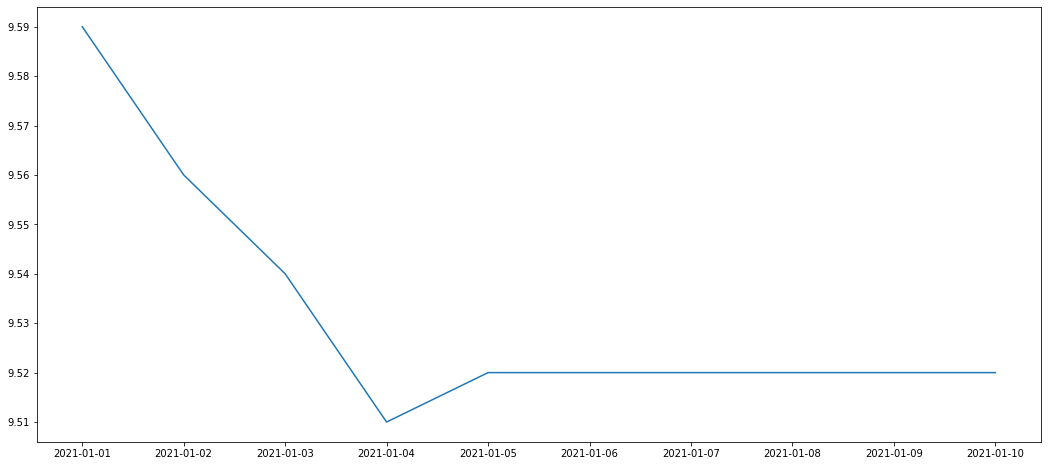

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
plt.plot(tmp['Date'],tmp['Point'])
plt.show()